<a href="https://colab.research.google.com/github/sumeet022/SmallCapStocks/blob/main/SmallCapStocks_Bse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import os
import glob
import pandas as pd
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
# !pip install datasets transformers
b = pd.read_csv(r"/content/BseLargeDeals")
ClientSheet = pd.read_csv(r"/content/ClientNames.csv")
b = b.drop_duplicates()
new_column_names = {
    'deal Date': 'date',
    'deal Type *': 'type',
    'price **': 'price',
    'security Name':'security_name',
    'client Name':'client_name'
    # Add more mappings as needed
}
# Use the rename() method to rename columns
b = b.rename(columns=new_column_names)
bse = b.iloc[:,[0,2,3,4,5,6]]
replace_dict = {'S': 'SELL', 'B': 'BUY'}
b['type'].replace(replace_dict, inplace=True)
b['price'] = b['price'].apply(lambda x: re.sub(r'[^\d.]', '', x))
b['price'] = b['price'].astype(float)

# This part is to filter out unique elements where the people only brought and sold the shares not on the same day

filtered_df = b[~b.groupby(['date', 'client_name'])['type'].transform(lambda x: x.nunique() == 2)]
# Now, filter out rows for each client where they bought and sold on the same day
result_df = filtered_df.groupby(['date', 'client_name']).filter(lambda x: len(x) < 2)

In [16]:
LessThan10_GreaterThan5 = result_df[(result_df['price'] > 5) & (result_df['price'] < 10)]
LessThan5_GreaterThan4 = result_df[(result_df['price'] < 5) & (result_df['price'] > 4)]
LessThan4_GreaterThan3 = result_df[(result_df['price'] < 4) & (result_df['price'] > 3)]
LessThan3_GreaterThan2 = result_df[(result_df['price'] < 3) & (result_df['price'] > 2)]
LessThan2 = result_df[(result_df['price'] < 2)]
LessThan20_GreaterThan10 = result_df[(result_df['price'] > 10) & (result_df['price'] < 20)]
LessThan30_GreaterThan20 = result_df[(result_df['price'] > 20) & (result_df['price'] < 30)]
LessThan100_GreaterThan30 = result_df[(result_df['price'] > 30)]

In [17]:
LessThan5_GreaterThan4

,date,security Code,security_name,client_name,type,quantity,price
238,28/02/2024,543546,HEALTHYLIFE,WEALTH FIRST PORTFOLIO MANAGERS PVT LTD.,SELL,"300,000",4.07
264,28/02/2024,511447,SYLPH,MANSI SHARE & STOCK ADVISORS PRIVATE LIMITED,SELL,"1,271,942",4.48
313,29/02/2024,542802,GALACTICO,VIPUL DILEEP LATHI,SELL,"1,047,042",4.65
437,01/03/2024,542802,GALACTICO,VIPUL DILEEP LATHI,SELL,"1,140,767",4.54
562,04/03/2024,531496,OMKAR,N L RUNGTA HUF,SELL,"58,729",4.08
563,04/03/2024,531496,OMKAR,ABHI RAJESHKUMAR PATEL,BUY,"97,978",4.08
718,06/03/2024,542206,NIVAKA,INVESTI GLOBAL OPPORTUNITY FUND PCC - CELL 1,BUY,"600,000",4.36
908,11/03/2024,541337,MILEFUR,MANJU GAGGAR,BUY,"96,000",4.25
909,11/03/2024,541337,MILEFUR,KINCHIT SUNILKUMAR MEHTA HUF,SELL,"48,000",4.22
926,11/03/2024,512197,SILVERO,HARNISH BHARAT DOSHI,BUY,"15,000",4.09


In [18]:
LessThan4_GreaterThan3

,date,security Code,security_name,client_name,type,quantity,price
165,26/02/2024,511700,STANCAP,DOLFIN MERCHANTS PRIVATE LIMITED,SELL,"20,000,000",3.38
167,26/02/2024,511700,STANCAP,WESSEL CONSULTANCY PRIVATE LIMITED,BUY,"10,510,000",3.39
528,04/03/2024,539486,GEETANJ,NARENDRA BABU KADATHUR HARIDAS,SELL,"29,422",3.60
529,04/03/2024,539486,GEETANJ,LEELAMMATHENUMKALJOSEPH,BUY,"30,000",3.60
564,04/03/2024,531496,OMKAR,ARJAVI HEMANTBHAI BHOOT,SELL,"48,345",3.90
794,07/03/2024,539228,GGPL,PARTON TRADERS PRIVATE LIMITED,SELL,"1,180,000",3.77
795,07/03/2024,539228,GGPL,EMKAY COMMERCIAL COMPANY LIMITED,BUY,"1,203,000",3.77
884,11/03/2024,539486,GEETANJ,LEELAMMATHENUMKALJOSEPH,BUY,"125,369",3.78
885,11/03/2024,539486,GEETANJ,SATYA PRAKASH LOMROR,SELL,"30,010",3.78


In [19]:
LessThan3_GreaterThan2

,date,security Code,security_name,client_name,type,quantity,price
537,04/03/2024,541627,HITECHWIND,LAXMI PAT DUDHERIA,BUY,"28,998",2.49
828,07/03/2024,539673,RCL,SIVAKUMARVENKATABOBBA,BUY,"177,602",2.35
829,07/03/2024,539673,RCL,BEENA KIZHAKKE UTHAMANTHIL,SELL,"140,000",2.35
1015,12/03/2024,531411,TUNITEX,NITIN BAKSHI,BUY,"753,488",2.11


In [20]:
LessThan2

,date,security Code,security_name,client_name,type,quantity,price
4,23/02/2024,539277,ALSTONE,SPARK FINANCE,BUY,"12,500,000",0.83
5,23/02/2024,539277,ALSTONE,AVAIL FINANCIAL SERVICES LIMITED,SELL,"76,440,000",0.83
63,23/02/2024,538975,SHREESEC,FABER TREXIM PRIVATE LIMITED,SELL,"14,500,000",0.38
95,26/02/2024,539506,ADCON,SPARK FINANCE,BUY,"1,500,000",1.33
96,26/02/2024,539506,ADCON,VIJAY PODDAR HUF,SELL,"1,500,000",1.33
97,26/02/2024,539506,ADCON,SANGEETA KALPESH CHAWALLA,SELL,"940,682",1.33
154,26/02/2024,539669,RGF,KARVA AUTOMART LIMITED,SELL,"1,987,166",0.79
157,26/02/2024,530251,RISAINTL,MANISH GYANDCHAND MEHTA,SELL,"982,993",0.66
163,26/02/2024,538975,SHREESEC,FABER TREXIM PRIVATE LIMITED,SELL,"4,401,256",0.40
242,28/02/2024,505523,MAHACORP,BHAVYA DHIMAN,SELL,"7,350,000",1.64


In [21]:
LessThan10_GreaterThan5

,date,security Code,security_name,client_name,type,quantity,price
2,23/02/2024,538351,AFEL,ANUPREET KAUR SARABJIT KEER,SELL,"89,962",6.84
57,23/02/2024,531280,PANKAJPO,GARNET INTERNATIONAL LIMITED,SELL,"33,081",8.26
106,26/02/2024,538351,AFEL,ANUPREET KAUR SARABJIT KEER,SELL,"80,000",6.83
115,26/02/2024,531977,CHLOGIST,JAYA KISHORKUMAR GANDHI,SELL,"1,167,000",6.62
116,26/02/2024,531977,CHLOGIST,NISHA KANUBHAI MAKWANA,BUY,"1,544,784",6.69
122,26/02/2024,540190,FRANKLININD,RYKKA CORPORATION PRIVATE LIMITED,SELL,"200,000",7.71
127,26/02/2024,539216,GARMNTMNTR,FEROZA ANWAR SHAIKH,SELL,"579,645",8.04
128,26/02/2024,539216,GARMNTMNTR,JIGARBHAI ARVINDRAY SHAH,SELL,"546,346",7.98
168,26/02/2024,543745,SVS,FINVENTION FINVEST PRIVATE LIMITED,SELL,"114,000",8.49
169,26/02/2024,543745,SVS,SUNNY SURENDRAKUMAR SHARMA,BUY,"114,000",8.50


In [22]:
LessThan20_GreaterThan10

,date,security Code,security_name,client_name,type,quantity,price
18,23/02/2024,530249,BRIDGESE,B.M. HOUSE (INDIA) LIMITED,SELL,"20,000",19.25
19,23/02/2024,530249,BRIDGESE,HARSHAD AMRUTLAL PANCHAL,BUY,"25,539",19.25
34,23/02/2024,543286,JETMALL,SHRENA KALPESH SHAH,BUY,"84,000",17.00
35,23/02/2024,543286,JETMALL,R D SHAH STOCK BROKERS PRIVATE LIMITED,SELL,"84,000",17.00
37,23/02/2024,511131,KAMANWALA,VARSHA CHUGH,BUY,"85,653",16.79
...,...,...,...,...,...,...,...
960,12/03/2024,513309,GOLKONDA,UTPAL AGRAWAL,SELL,"250,000",15.50
1014,12/03/2024,533629,TIJARIA,NAV CAPITAL VCC - NAV CAPITAL EMERGING STAR FUND,BUY,"362,186",15.87
1023,12/03/2024,542803,VEL,SAROJDEVI SATYANARAYAN KABRA,SELL,"275,000",11.20
1024,12/03/2024,542803,VEL,KAILASH KABRA,SELL,"200,000",11.25


In [23]:
LessThan30_GreaterThan20

,date,security Code,security_name,client_name,type,quantity,price
56,23/02/2024,543637,PACE,SHAIVAL D GANDHI,SELL,"158,400",27.50
78,23/02/2024,511523,VEERHEALTH,KRUPA HARSH JAIN,SELL,"500,000",27.31
83,23/02/2024,511523,VEERHEALTH,MONIKA SHARMA,BUY,"107,000",28.91
117,26/02/2024,512379,CRESSAN,VAISHALI COMMOSALES LLP,BUY,"2,041,677",22.94
134,26/02/2024,538778,KALYANCAP,UDAY R SHAH HUF,BUY,"342,000",25.16
...,...,...,...,...,...,...,...
963,12/03/2024,541983,INNOVATIVE,VISHAL BHANDARI,SELL,"78,000",26.92
988,12/03/2024,543924,SONALIS,MEHUL BHARATBHAI SHAH HUF,SELL,"42,000",29.62
991,12/03/2024,543924,SONALIS,ABHIJITH PUTTA,BUY,"40,000",29.62
992,12/03/2024,543924,SONALIS,KHATNANI VISHAL,BUY,"12,000",29.62


In [24]:
LessThan100_GreaterThan30

,date,security Code,security_name,client_name,type,quantity,price
0,23/02/2024,539661,ACEMEN,APURVABHAI DILIPBHAI SHAH,SELL,"19,904",47.55
3,23/02/2024,535916,ALSL,ANISH DILIP SHAH,SELL,"200,000",46.94
14,23/02/2024,539301,ARVSMART,ICICI PRUDENTIAL EQUITY OPPORTUNITIES FUND,BUY,"465,000",582.00
15,23/02/2024,539301,ARVSMART,KAUSALYA REALSERVE LLP .,SELL,"700,000",582.02
16,23/02/2024,538576,BHANDERI,JOINDRE CAPITALS SERVICES LTD,SELL,"15,600",127.70
...,...,...,...,...,...,...,...
1003,12/03/2024,539310,THINKINK,SOCIETE GENERALE,SELL,"235,761",45.49
1004,12/03/2024,539310,THINKINK,AMAYSHA TEXTILES PRIVATE LIMITED,BUY,"1,420,000",44.88
1007,12/03/2024,539310,THINKINK,BHARATH KUMAR PALATLA,SELL,"200,000",45.00
1008,12/03/2024,539310,THINKINK,GIRIRAJ RATAN DAMANI,SELL,"225,000",44.64


In [25]:
TruestedNames = result_df[result_df['client_name'].isin(ClientSheet['Client_Name'])]
TruestedNames

,date,security Code,security_name,client_name,type,quantity,price
399,29/02/2024,533629,TIJARIA,F3 ADVISORS PRIVATE LIMITED,SELL,"150,000",11.07


In [26]:
Names = result_df[result_df['security_name']=='TIJARIA']
Names

,date,security Code,security_name,client_name,type,quantity,price
399,29/02/2024,533629,TIJARIA,F3 ADVISORS PRIVATE LIMITED,SELL,"150,000",11.07
400,29/02/2024,533629,TIJARIA,ASHOK CHANDRAKANT SAMANI,BUY,"205,000",11.07
595,04/03/2024,533629,TIJARIA,NAV CAPITAL VCC - NAV CAPITAL EMERGING STAR FUND,BUY,"241,791",12.81
1014,12/03/2024,533629,TIJARIA,NAV CAPITAL VCC - NAV CAPITAL EMERGING STAR FUND,BUY,"362,186",15.87


In [27]:
Names = result_df[result_df['security_name']=='SCANPGEOM']
Names

,date,security Code,security_name,client_name,type,quantity,price
455,01/03/2024,526544,SCANPGEOM,MISHA ASHISH SHAH,BUY,"500,000",5.50
456,01/03/2024,526544,SCANPGEOM,SHAH ASHISH NAVNITLAL HUF,BUY,"500,000",5.50
457,01/03/2024,526544,SCANPGEOM,ASHISH N SHAH,BUY,"984,320",5.56
649,05/03/2024,526544,SCANPGEOM,MISHA ASHISH SHAH,BUY,"500,000",5.65
650,05/03/2024,526544,SCANPGEOM,HENA ASHISH SHAH,BUY,"500,000",5.65
651,05/03/2024,526544,SCANPGEOM,SWAPNEEL A SHAH,BUY,"1,000,000",5.65
652,05/03/2024,526544,SCANPGEOM,MAYUR MUKUNDBHAI DESAI,SELL,"2,000,000",5.65
834,07/03/2024,526544,SCANPGEOM,GAURANG PARMANAND SHAH,BUY,"978,000",5.81
835,07/03/2024,526544,SCANPGEOM,MAYUR MUKUNDBHAI DESAI,SELL,"978,742",5.81


In [46]:
result_df['date'] = pd.to_datetime(result_df['date'])
one_month_ago = datetime.now() - timedelta(days=30)  # Assuming 30 days as a month
df_last_month = result_df[result_df['date'] >= one_month_ago]
security_counts = df_last_month['security_name'].value_counts()
with_price = df_last_month[['security_name','type','price']]
top_10_security = security_counts.head(10)
security_counts

THINKINK      29
RACONTEUR     15
GARMNTMNTR    11
DELTA         11
BRIDGESE      11
              ..
GALACTICO      1
ELIL           1
VALLABHSQ      1
SYLPH          1
USGTECH        1
Name: security_name, Length: 207, dtype: int64

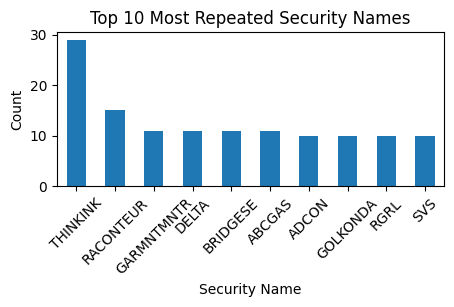

In [58]:
plt.figure(figsize=(5, 2))
top_10_security.plot(kind='bar')
plt.title('Top 10 Most Repeated Security Names')
plt.xlabel('Security Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
top_10_df = df_last_month[df_last_month['security_name'].isin(top_10_security.index)]
pivot_df = top_10_df.pivot_table(index='security_name', columns='type', aggfunc='size', fill_value=0)
fig = px.bar(pivot_df, x=pivot_df.index, y=pivot_df.columns,barmode='group', title='Top 10 Most Repeated Security Names with Types Count')
fig.update_layout(xaxis_tickangle=-15)
fig.show()